### CS310 Assignment 3. 
by Dr. Zhiyun Li, Fall/2022
### Find the two most correlated stocks.

#### The sample correlation coefficient formula is

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/332ae9dcde34d03f30ed6e1880af8b43327dd49c">

#### where ${\overline {x}}$ and ${\overline {y}}$ are the sample means of $[x1, x2, ..., xn]$ and $[y1, y2, ..., yn]$

### Data Preparation

Load the historial daily data of the entire 2018 for the 6 stocks 

```python
tks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB']
```

You are provided with 6 csv files. IBM.csv, MSFT.csv, etc. Each of the csv file should look like,

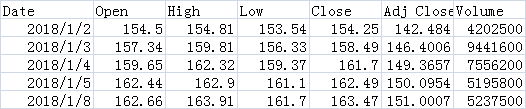

### Retrieve the "Adj Close" column values as the daily prices of each stock

Please find your own way (there are many ways) to read the csv file, split the row, split the column and retrieve the "Adj Close" column values and store them into a dictionary such as

```python
allprices={
        'IBM': [142.48, 146,40, 149.36, 150.10, ... ],
        'MSFT': [...],
        'GOOG': [...],
        ...
        }
```

### (40 points) Part 1: Compute the correlation between any two stocks. Write you non-NumPy version code. 

Please do NOT use any library to calculate correlations directly. You should use the above formula to implement the correlation algorithm.

#### output

Print all stock pairs and their correlations from max to min. The format should look like,

```python
IBM:MSFT = 0.763
IBM:GOOG = 0.627
...
AMZN:FB = 0.234
```
#### Tips: By definition, the correlation is symmetrical, i.e., ${r_{xy}}$ = ${r_{yx}}$, so when you have IBM:MSFT, you can skip MSFT:IBM.

### (40 points) Part 2: Write an one line numpy vectorized version of function correlation(x, y) to compute the correlation of two lists x, and y. 

### (20 points) Part 3: Compare the run time of both implementations.

### How do I grade?
Your output results for Part 1 and Part 2 will be either all correct or all wrong. For wrong results, you will lose 10 points in that part. If your function crashes, you will lose 20 points in that part. If your results for Part 3 are not reasonable, you will lose 10 points. 

You should be able to implement using only what we learned in class so far.

You are encouraged to discuss with other students about the high-level ideas, but never share anything at code level. You will have to write your own code independently. Plagiarism will be detected and reported.

### Deliverables:
Please submit your code and results in your code comments to canvas as a single assn3.py file

           Date       Open       High        Low      Close  Adj Close  \
0    2018-01-02  62.400002  64.421997  62.200001  64.106003  64.106003   
1    2018-01-03  64.199997  65.050003  63.110001  63.450001  63.450001   
2    2018-01-04  62.574001  63.709999  61.136002  62.924000  62.924000   
3    2018-01-05  63.324001  63.448002  62.400002  63.316002  63.316002   
4    2018-01-08  63.200001  67.403999  63.099998  67.281998  67.281998   
5    2018-01-09  67.031998  67.760002  65.480003  66.737999  66.737999   
6    2018-01-10  66.440002  67.400002  66.000000  66.959999  66.959999   
7    2018-01-11  67.047997  68.961998  66.652000  67.589996  67.589996   
8    2018-01-12  67.725998  68.082001  66.734001  67.244003  67.244003   
9    2018-01-16  67.508003  69.000000  66.959999  68.012001  68.012001   
10   2018-01-17  68.094002  69.800003  67.949997  69.431999  69.431999   
11   2018-01-18  69.134003  70.459999  68.748001  68.914001  68.914001   
12   2018-01-19  69.000000  70.117996 

In [34]:
import csv

def get_adj_column(filename):
    file = open(filename, 'r')
 
    # creating dictreader object
    csv_file = csv.DictReader(file)
 
    # creating empty lists
    adj_close_strings = []
 
    # iterating over each col and append
    # values to empty list
    for col in csv_file:
        adj_close_strings.append(col['Adj Close'])
        
    adj_close = []
    
    for value in adj_close_strings:
        adj_close.append(float(value))
    
    # returning list
    return adj_close

In [35]:
allprices = {
    "IBM":get_adj_column('IBM.csv'),
    "MSFT":get_adj_column('MSFT.csv'),
    "GOOG":get_adj_column('GOOG.csv'),
    "AAPL": get_adj_column('AAPL.csv'),
    "AMZN":get_adj_column('AMZN.csv'),
    "FB":get_adj_column('FB.csv')
}

In [36]:
print(allprices)

{'IBM': [132.039154, 135.668625, 138.416412, 139.092651, 139.931534, 140.239685, 140.539291, 140.556442, 139.649033, 140.256821, 144.365646, 144.767975, 138.989914, 139.186813, 142.311234, 141.557938, 141.643539, 143.244263, 142.782043, 140.059937, 140.128418, 139.01561, 136.130844, 130.566818, 132.972183, 131.696747, 127.582039, 129.241745, 130.875504, 130.313644, 133.780045, 134.86058, 135.007523, 134.125824, 133.088486, 132.414215, 134.437012, 137.082169, 135.327393, 134.704971, 132.958817, 133.546661, 135.673126, 134.609879, 136.857422, 135.033478, 137.713226, 138.534393, 137.721863, 136.684555, 137.972519, 138.534393, 136.018906, 135.024811, 135.44838, 131.471985, 128.705811, 132.578461, 131.316391, 131.843735, 132.630325, 129.725815, 129.53566, 133.226791, 133.148972, 130.158066, 131.990646, 134.324646, 134.298691, 136.641312, 135.465668, 136.485703, 139.096329, 128.619339, 127.677116, 125.256699, 126.086571, 125.827209, 126.155724, 126.829964, 126.622505, 125.308563, 125.343155,

In [37]:
import math
import statistics

def get_correlation_numerator(list_x, list_y):
    mean_x = statistics.mean(list_x)
    mean_y = statistics.mean(list_y)
    if len(list_x) != len(list_y):
        raise ValueError("lists must be the same length")
    sum_of_product = 0
    for i in range(len(list_x)):
        sum_of_product += (list_x[i]-mean_x)*(list_y[i]-mean_y)
    return sum_of_product

def sum_of_correlation_squares(list_n):
    sum_of_corr_sq = 0
    mean_n = statistics.mean(list_n)
    for i in range(len(list_n)):
        sum_of_corr_sq += (list_n[i]-mean_n)**2
    return sum_of_corr_sq
    
def get_correlation(list_x, list_y):
    correlation_numerator = get_correlation_numerator(list_x, list_y)
    correlation_value = (correlation_numerator)/(math.sqrt(sum_of_correlation_squares(list_x)*sum_of_correlation_squares(list_y)))
    return correlation_value


In [39]:
get_correlation(allprices['IBM'],allprices['MSFT'])

-0.4212553003530259